In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
data = pd.read_csv('data2019-04-02 12_48_35.csv')
# data.dropna(axis=0)
data.shape

(120000, 6)

In [3]:
data.dropna(axis=0)
data.shape

(120000, 6)

In [4]:
data['container-title'].replace(['Chem. Commun.', 'RSC Adv.','Natural Hazards and Earth System Sciences','J. Mater. Chem. A','Dalton Trans.','JOURNAL OF CIVIL ENGINEERING AND MANAGEMENT'], 
                      ['Chemical Communications', 'RSC Advances','Natural Hazards and Earth System Science','Journal of Materials Chemistry A','Dalton Transactions','Journal of Civil Engineering and Management'], inplace=True)

In [52]:
journals = []

for i in data['container-title']:
    if not i in journals:
        journals.append(i)

# journals

In [53]:
journalsdict = dict()

for indx, i in enumerate(journals):
    journalsdict[i] = indx
    
# journalsdict

In [7]:
data['y'] = data['container-title'].apply(lambda x : journalsdict[x])
data.head()

,Unnamed: 0,DOI,cleanTitle,container-title,cleanAbstract,is-referenced-by-count,y
0,0,10.1039/c3ra46913a,esr study spin adducts three analogues depmpo ...,RSC Advances,paverage geometries nitroxide adducts various ...,1,0
1,1,10.1039/c3ra46462h,reactions mono bicyclic enol ethers i–hydroper...,RSC Advances,preactions mono bicyclic enol ethers isubsub–h...,7,0
2,2,10.1039/c3ra46915h,copper catalyzed oxidative cascade coupling n ...,RSC Advances,pan oxidative cascade coupling reaction italic...,19,0
3,3,10.1039/c3ra46453a,catalytic wet peroxide oxidation phenol ch ch ...,RSC Advances,punder ambient temperature atmospheric pressur...,10,0
4,4,10.1039/c3ra46967k,supramolecular analyte recognition experiment ...,RSC Advances,psynergy experimental theoretical tools made s...,5,0


### Randomizing data

In [8]:
data = data.reindex(np.random.permutation(data.index))
data = data.reindex(np.random.permutation(data.index))
data = data.reindex(np.random.permutation(data.index))
data

,Unnamed: 0,DOI,cleanTitle,container-title,cleanAbstract,is-referenced-by-count,y
69120,120,10.1039/c3nr05894h,controlled fabrication porous double walled ti...,Nanoscale,pdouble walled tiosubsub nanotubes porous wall...,15,8
106529,529,10.1107/s0021889801017800,interpretation optical rotatory dispersion tel...,Journal of Applied Crystallography,interpretation recent experimental data optica...,8,12
73513,513,10.1039/c4cc01689k,semiconducting polymer dots monofunctional groups,Chemical Communications,pthis communication describes approach prepari...,5,9
81225,225,10.1071/ph890431,field enhanced intrinsic fluctuations highly o...,Australian Journal of Physics,experimental resistance versus temperature plo...,1,10
90111,111,10.1180/000985501750539490,weathering smectite illite smectite temperate ...,Clay Minerals,jats titleabstractjats title weathering profil...,27,11
27696,696,10.1039/c4cp02287d,structural influence photoluminescence propert...,Phys. Chem. Chem. Phys.,pthe influence cation ordering sb lt nb lt ta ...,16,2
51981,981,10.3189/002214356793701929,glacial activity western united states,Journal of Glaciology,jats titleabstractjats title four coordinated ...,6,7
40690,690,10.1071/ch14157,low valent iron complexes stabilised bulky gua...,Australian Journal of Chemistry,toluene capped guanidinato iron complex pipiso...,15,6
98382,382,10.1180/0009855043920126,oxidation mudstone tunnel tournemire france co...,Clay Minerals,jats titleabstractjats title excavation tunnel...,16,11
13289,289,10.1039/c4ta00793j,bio inspired carbon nitride mesoporous spheres...,Journal of Materials Chemistry A,pthe bio inspired mesoporous structured graphi...,37,1


### Handle Unicode

In [9]:
def handleunicode(x):
    try:
        x.decode(encoding='utf-8')
        return x
    except:
        return x

In [10]:
data['cleanTitle'] = data['cleanTitle'].apply(lambda x : handleunicode(x))
data['cleanAbstract'] = data['cleanAbstract'].apply(lambda x :  handleunicode(x))

data.head()

,Unnamed: 0,DOI,cleanTitle,container-title,cleanAbstract,is-referenced-by-count,y
69120,120,10.1039/c3nr05894h,controlled fabrication porous double walled ti...,Nanoscale,pdouble walled tiosubsub nanotubes porous wall...,15,8
106529,529,10.1107/s0021889801017800,interpretation optical rotatory dispersion tel...,Journal of Applied Crystallography,interpretation recent experimental data optica...,8,12
73513,513,10.1039/c4cc01689k,semiconducting polymer dots monofunctional groups,Chemical Communications,pthis communication describes approach prepari...,5,9
81225,225,10.1071/ph890431,field enhanced intrinsic fluctuations highly o...,Australian Journal of Physics,experimental resistance versus temperature plo...,1,10
90111,111,10.1180/000985501750539490,weathering smectite illite smectite temperate ...,Clay Minerals,jats titleabstractjats title weathering profil...,27,11


In [11]:
#Feature 1 : only title
data["X1"] = data['cleanTitle']
#Feature 2 : only abstract
data["X2"] = data['cleanAbstract']
#Feature 3 : title + abstract
data["X3"] = data.apply(lambda x : str(x["cleanTitle"])+ " " + str(x["cleanAbstract"]), axis=1)
data.head()

,Unnamed: 0,DOI,cleanTitle,container-title,cleanAbstract,is-referenced-by-count,y,X1,X2,X3
69120,120,10.1039/c3nr05894h,controlled fabrication porous double walled ti...,Nanoscale,pdouble walled tiosubsub nanotubes porous wall...,15,8,controlled fabrication porous double walled ti...,pdouble walled tiosubsub nanotubes porous wall...,controlled fabrication porous double walled ti...
106529,529,10.1107/s0021889801017800,interpretation optical rotatory dispersion tel...,Journal of Applied Crystallography,interpretation recent experimental data optica...,8,12,interpretation optical rotatory dispersion tel...,interpretation recent experimental data optica...,interpretation optical rotatory dispersion tel...
73513,513,10.1039/c4cc01689k,semiconducting polymer dots monofunctional groups,Chemical Communications,pthis communication describes approach prepari...,5,9,semiconducting polymer dots monofunctional groups,pthis communication describes approach prepari...,semiconducting polymer dots monofunctional gro...
81225,225,10.1071/ph890431,field enhanced intrinsic fluctuations highly o...,Australian Journal of Physics,experimental resistance versus temperature plo...,1,10,field enhanced intrinsic fluctuations highly o...,experimental resistance versus temperature plo...,field enhanced intrinsic fluctuations highly o...
90111,111,10.1180/000985501750539490,weathering smectite illite smectite temperate ...,Clay Minerals,jats titleabstractjats title weathering profil...,27,11,weathering smectite illite smectite temperate ...,jats titleabstractjats title weathering profil...,weathering smectite illite smectite temperate ...


In [12]:
data.head()

,Unnamed: 0,DOI,cleanTitle,container-title,cleanAbstract,is-referenced-by-count,y,X1,X2,X3
69120,120,10.1039/c3nr05894h,controlled fabrication porous double walled ti...,Nanoscale,pdouble walled tiosubsub nanotubes porous wall...,15,8,controlled fabrication porous double walled ti...,pdouble walled tiosubsub nanotubes porous wall...,controlled fabrication porous double walled ti...
106529,529,10.1107/s0021889801017800,interpretation optical rotatory dispersion tel...,Journal of Applied Crystallography,interpretation recent experimental data optica...,8,12,interpretation optical rotatory dispersion tel...,interpretation recent experimental data optica...,interpretation optical rotatory dispersion tel...
73513,513,10.1039/c4cc01689k,semiconducting polymer dots monofunctional groups,Chemical Communications,pthis communication describes approach prepari...,5,9,semiconducting polymer dots monofunctional groups,pthis communication describes approach prepari...,semiconducting polymer dots monofunctional gro...
81225,225,10.1071/ph890431,field enhanced intrinsic fluctuations highly o...,Australian Journal of Physics,experimental resistance versus temperature plo...,1,10,field enhanced intrinsic fluctuations highly o...,experimental resistance versus temperature plo...,field enhanced intrinsic fluctuations highly o...
90111,111,10.1180/000985501750539490,weathering smectite illite smectite temperate ...,Clay Minerals,jats titleabstractjats title weathering profil...,27,11,weathering smectite illite smectite temperate ...,jats titleabstractjats title weathering profil...,weathering smectite illite smectite temperate ...


In [13]:
X = data.X1
y = data.y


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.50)

In [14]:
# examine the object shapes
print(X_train.shape)
print(X_test.shape)

data.describe()

(60000,)
(60000,)


,Unnamed: 0,is-referenced-by-count,y
count,120000.000000,120000.000000,120000.000000
mean,499.500000,18.445083,6.955250
std,288.676193,28.624008,4.169519
min,0.000000,0.000000,0.000000
25%,249.750000,5.000000,3.750000
50%,499.500000,11.500000,7.500000
75%,749.250000,23.000000,10.250000
max,999.000000,1538.000000,13.000000


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

def allModels(vect, model, name):
    try:
        # create document-term matrices using the vectorizer
        X_train_dtm = vect.fit_transform(X_train.values.astype('U'))
        X_test_dtm = vect.transform(X_test)
        print(name)
        # print the number of features that were generated
        print('Features: ', X_train_dtm.shape[1])

        # use Multinomial Naive Bayes to predict the star rating
        nb = model
        print(model)
        nb.fit(X_train_dtm, y_train)
        y_pred_class = nb.predict(X_test_dtm)
        trainAcc = metrics.accuracy_score(y_train, nb.predict(X_train_dtm))
        testAcc =  metrics.accuracy_score(y_test, y_pred_class)
        # Get the training accuracy

        print('Training Accuracy: ', trainAcc)
        # print the accuracy of its predictions
        print('Test Accuracy: ',testAcc)

        return {"model":name, "trainacc": trainAcc, "testacc": testAcc,
                "ytest":X_test_dtm, "ypredict":y_pred_class, "parameters": model}
    except:
        return None

In [43]:
names = []
classifiers= []
for i in range(0, 300, 50):
    if i == 0:
        classifiers.append(RandomForestClassifier(max_depth=1, n_estimators=10, max_features=16897))
        names.append("RF- max depth: "+str(1))
    else:
        classifiers.append(RandomForestClassifier(max_depth=i, n_estimators=10, max_features=16897))
        names.append("RF- max depth: "+str(i))
allresults = []

for i in range(len(names)):
    vect = CountVectorizer()
    allresults.append(allModels(vect, classifiers[i], names[i]))

RF- max depth: 1
Features:  16897
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features=16897, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Training Accuracy:  0.121
Test Accuracy:  0.12033333333333333
RF- max depth: 50
Features:  16897
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features=16897, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Training Accuracy:  0.61455


In [51]:
# allresults

In [50]:
newRes = []
for i in allresults:
    if i is not None:
        newRes.append(i)
# newRes

In [46]:
ress = pd.DataFrame(newRes)
ind = list(ress.model)
tacc = list(ress.trainacc)
tesac = list(ress.testacc)
ress2 = pd.DataFrame({"TrainAccuracy":tacc, "TestAccuracy":tesac}, index=ind)
ress2


,TrainAccuracy,TestAccuracy
RF- max depth: 1,0.121000,0.120333
RF- max depth: 50,0.614550,0.600283
RF- max depth: 100,0.834650,0.820517
RF- max depth: 150,0.929983,0.918850
RF- max depth: 200,0.962400,0.954933
RF- max depth: 250,0.975933,0.968233


In [48]:
ress2.to_csv("RandomForestTuiningResults.csv", index=False)

<Figure size 1440x720 with 0 Axes>

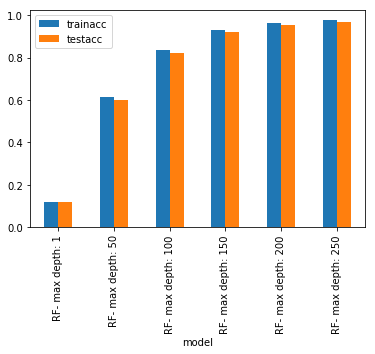

In [49]:
plt.figure(figsize=(20,10))
ress.plot.bar(x='model', y=['trainacc', 'testacc'])
plt.show()